In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
# for elementary image manipulation
from scipy import misc

import nested_utilities as nutil
import nested_plot as nplot

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Some evaluation

In [2]:
# Load the prediction df if not running the prediction code
interior_test_pred = pd.read_csv('./data_catalogues/interior_test_pred_260318.csv', index_col=0)

In [3]:
interior_test_pred.head()

,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id
0,bathroom,bathroom,0.999998,kitchen,0.000001,empty,7.169086e-08,True,False,False,./data/test_data/bathroom/003457d1fb62155b4531...,003457d1fb62155b4531aba3e5b39f4d57bed9f9.jpg,003457d1fb62155b4531aba3e5b39f4d57bed9f9
1,bathroom,bathroom,0.999782,kitchen,0.000217,diningroom,9.364485e-07,True,False,False,./data/test_data/bathroom/0038cad4553a9922d24a...,0038cad4553a9922d24a70a4d77abb9d2c1261f9.jpg,0038cad4553a9922d24a70a4d77abb9d2c1261f9
2,bathroom,bathroom,0.999678,bedroom,0.000118,kitchen,1.028072e-04,True,False,False,./data/test_data/bathroom/003f5052b875f64f4f5c...,003f5052b875f64f4f5ce99948ae87f35d44b009.jpg,003f5052b875f64f4f5ce99948ae87f35d44b009
3,bathroom,bathroom,0.999844,kitchen,0.000082,bedroom,5.523511e-05,True,False,False,./data/test_data/bathroom/009e866e3eb114c3bc85...,009e866e3eb114c3bc8579d780a4c333ddd38da9.jpg,009e866e3eb114c3bc8579d780a4c333ddd38da9
4,bathroom,bathroom,0.999998,kitchen,0.000002,diningroom,1.329193e-09,True,False,False,./data/test_data/bathroom/00da56e13e015b383eff...,00da56e13e015b383effff3fe8560ae7fa7cb1f9.jpg,00da56e13e015b383effff3fe8560ae7fa7cb1f9


In [4]:
interior_test_pred['label1_correct'].mean()

0.8507268951194185

In [5]:
interior_test_pred['label2_correct'].mean()

0.08515057113187954

In [6]:
interior_test_pred['label3_correct'].mean()

0.02881619937694704

0.8507268951194185
              precision    recall  f1-score   support

    bathroom       0.99      0.94      0.96       602
     bedroom       0.91      0.93      0.92       856
conservatory       1.00      0.64      0.78        22
  diningroom       0.80      0.61      0.69       277
       empty       0.83      0.94      0.88       362
    entrance       0.64      0.53      0.58       105
     graphic       1.00      0.83      0.90        23
     kitchen       0.86      0.93      0.89       681
  livingroom       0.85      0.83      0.84       704
    misc_int       0.46      0.38      0.42       154
       study       0.35      0.56      0.43        66

 avg / total       0.85      0.85      0.85      3852



''

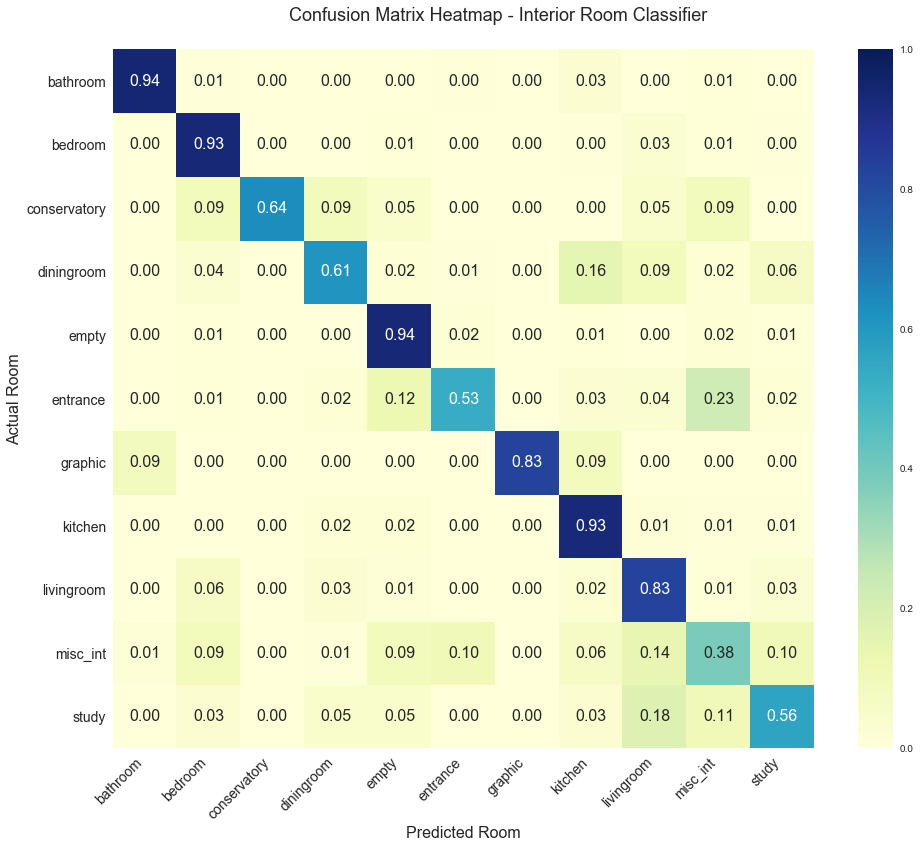

In [25]:
y_true = interior_test_pred['room']
y_pred = interior_test_pred['label1']
labels = interior_test_pred['room'].unique()

conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

fig, ax = plt.subplots(figsize=(14,12))


nplot.plot_confusion_matrix(conf_mat, labels, fig, ax, normalise=True)
;

In [ ]:
#fig.savefig('./working_data/int_class_cm.png')

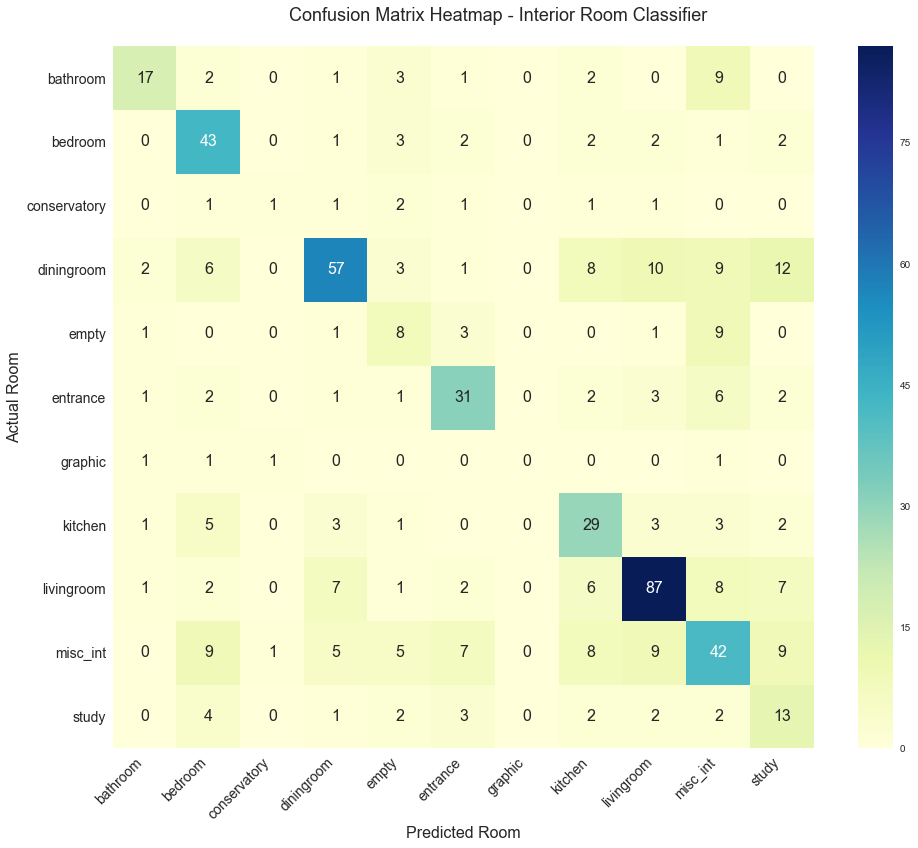

In [12]:
label2 = interior_test_pred.loc[interior_test_pred['label1_correct'] == False].copy()

y_true_2 = label2['room']
y_pred_2 = label2['label2']
labels_2 = label2['room'].unique()

conf_mat_2 = confusion_matrix(y_true_2, y_pred_2, labels=labels_2)
#conf_mat_2

fig, ax = plt.subplots(figsize=(14,12))

nplot.plot_confusion_matrix(conf_mat_2, labels_2, fig, ax, normalise=False)

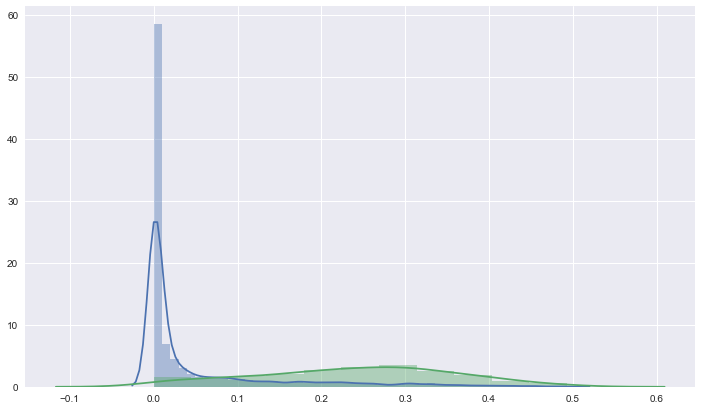

In [13]:
data = interior_test_pred.loc[interior_test_pred['label1_correct'] == True, ['label2_P']]
data_2 = interior_test_pred.loc[interior_test_pred['label2_correct'] == True, ['label2_P']]

fig, ax = plt.subplots(figsize=(12,7))

sns.distplot(data, kde=True, ax=ax)
sns.distplot(data_2, kde=True, ax=ax)

In [15]:
mask = ((interior_test_pred['label1_correct'] == False) & (interior_test_pred['label1_P'] > 0.9))
interior_test_pred.loc[mask].shape

(49, 13)

In [68]:
interior_test_pred.loc[mask]

,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id
195,bathroom,kitchen,0.990098,bathroom,8.637263e-03,livingroom,4.604210e-04,False,True,False,./data/test_data/bathroom/06992327e67ab4a6783e...,06992327e67ab4a6783ea2fc9640aa6dcb5e69f6.jpg,06992327e67ab4a6783ea2fc9640aa6dcb5e69f6
227,bathroom,kitchen,0.973387,bathroom,1.933282e-02,misc_int,1.956247e-03,False,True,False,./data/test_data/bathroom/06e55cbcafa42eb5fa46...,06e55cbcafa42eb5fa4668bb0696fda0ef470ca3.jpg,06e55cbcafa42eb5fa4668bb0696fda0ef470ca3
236,bathroom,kitchen,0.969115,empty,1.546607e-02,livingroom,6.764074e-03,False,False,False,./data/test_data/bathroom/06efb8b31442e23a3f15...,06efb8b31442e23a3f1549ecb46063dfecfdea36.jpg,06efb8b31442e23a3f1549ecb46063dfecfdea36
419,bathroom,kitchen,0.999982,diningroom,1.021916e-05,livingroom,3.117968e-06,False,False,False,./data/test_data/bathroom/0899acc8228ad6e1a13c...,0899acc8228ad6e1a13ccf2a151b1b7814105f0a.jpg,0899acc8228ad6e1a13ccf2a151b1b7814105f0a
550,bathroom,diningroom,0.918435,kitchen,2.699613e-02,livingroom,2.277626e-02,False,False,False,./data/test_data/bathroom/24cf766dbff5c70cc29d...,24cf766dbff5c70cc29d40a06b69a23c52408139.jpg,24cf766dbff5c70cc29d40a06b69a23c52408139
644,bedroom,livingroom,0.963914,bedroom,2.004129e-02,diningroom,1.384804e-02,False,True,False,./data/test_data/bedroom/046484d356e38d98a9db0...,046484d356e38d98a9db08816e2cca8a1a9c56e9.jpg,046484d356e38d98a9db08816e2cca8a1a9c56e9
680,bedroom,livingroom,0.908907,bedroom,3.770585e-02,study,2.326382e-02,False,True,False,./data/test_data/bedroom/05244404590d204365a08...,05244404590d204365a08cd59cddc7d5b61b2768.jpg,05244404590d204365a08cd59cddc7d5b61b2768
1057,bedroom,kitchen,0.957533,livingroom,1.468264e-02,misc_int,8.341285e-03,False,False,False,./data/test_data/bedroom/07a804f5b1aa1996407e1...,07a804f5b1aa1996407e104705d371100b5c3ae8.jpg,07a804f5b1aa1996407e104705d371100b5c3ae8
1060,bedroom,livingroom,0.999568,bedroom,4.223025e-04,diningroom,6.879488e-06,False,True,False,./data/test_data/bedroom/07ac590f2bfcf3491a279...,07ac590f2bfcf3491a279ab23cea7f12657def54.jpg,07ac590f2bfcf3491a279ab23cea7f12657def54
1372,bedroom,livingroom,0.921147,bedroom,5.263292e-02,study,1.635474e-02,False,True,False,./data/test_data/bedroom/233c42c3fee981e1b1b23...,233c42c3fee981e1b1b234446ad9c100cd064829.jpg,233c42c3fee981e1b1b234446ad9c100cd064829


./data/test_data/bedroom/233c42c3fee981e1b1b234446ad9c100cd064829.jpg


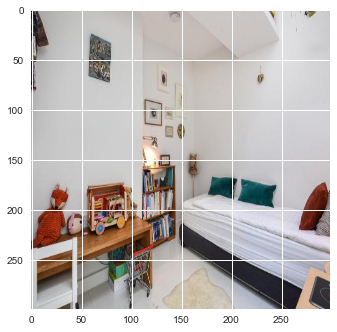

In [16]:
print(interior_test_pred.loc[mask]['image_path'].iloc[8])
img = nutil.read_img(interior_test_pred.loc[mask]['image_path'].iloc[8])
plt.figure()
plt.imshow(img)

In [22]:
def label_to_count(row):
    if row['label1'] == row['room']:
        return row['label1']
    elif row['label2'] == row['room'] and row['label2_P'] >=0.1:
        return row['label2']
    elif row['label3'] == row['room'] and row['label3_P'] >=0.1:
        return row['label3']
    else:
        return row['label1']

In [23]:
interior_test_pred['pred_from_3'] = interior_test_pred.apply(label_to_count, axis=1)
interior_test_pred.head()

,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id,pred_from_3
0,bathroom,bathroom,0.999998,kitchen,0.000001,empty,7.169086e-08,True,False,False,./data/test_data/bathroom/003457d1fb62155b4531...,003457d1fb62155b4531aba3e5b39f4d57bed9f9.jpg,003457d1fb62155b4531aba3e5b39f4d57bed9f9,bathroom
1,bathroom,bathroom,0.999782,kitchen,0.000217,diningroom,9.364485e-07,True,False,False,./data/test_data/bathroom/0038cad4553a9922d24a...,0038cad4553a9922d24a70a4d77abb9d2c1261f9.jpg,0038cad4553a9922d24a70a4d77abb9d2c1261f9,bathroom
2,bathroom,bathroom,0.999678,bedroom,0.000118,kitchen,1.028072e-04,True,False,False,./data/test_data/bathroom/003f5052b875f64f4f5c...,003f5052b875f64f4f5ce99948ae87f35d44b009.jpg,003f5052b875f64f4f5ce99948ae87f35d44b009,bathroom
3,bathroom,bathroom,0.999844,kitchen,0.000082,bedroom,5.523511e-05,True,False,False,./data/test_data/bathroom/009e866e3eb114c3bc85...,009e866e3eb114c3bc8579d780a4c333ddd38da9.jpg,009e866e3eb114c3bc8579d780a4c333ddd38da9,bathroom
4,bathroom,bathroom,0.999998,kitchen,0.000002,diningroom,1.329193e-09,True,False,False,./data/test_data/bathroom/00da56e13e015b383eff...,00da56e13e015b383effff3fe8560ae7fa7cb1f9.jpg,00da56e13e015b383effff3fe8560ae7fa7cb1f9,bathroom


0.9379543094496365
              precision    recall  f1-score   support

    bathroom       0.99      0.97      0.98       602
     bedroom       0.97      0.98      0.97       856
conservatory       1.00      0.77      0.87        22
  diningroom       0.93      0.80      0.86       277
       empty       0.92      0.98      0.95       362
    entrance       0.94      0.86      0.90       105
     graphic       1.00      0.87      0.93        23
     kitchen       0.93      0.97      0.95       681
  livingroom       0.93      0.95      0.94       704
    misc_int       0.83      0.71      0.77       154
       study       0.64      0.74      0.69        66

 avg / total       0.94      0.94      0.94      3852



''

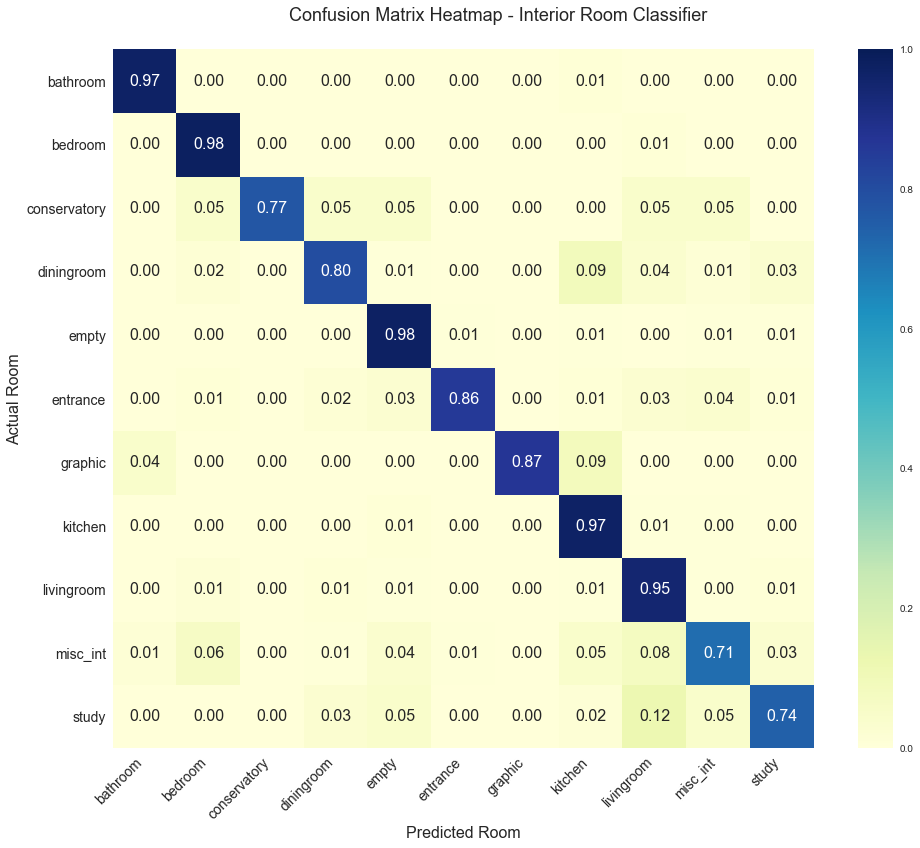

In [26]:
y_true = interior_test_pred['room']
y_pred = interior_test_pred['pred_from_3']
labels = interior_test_pred['room'].unique()

conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

fig, ax = plt.subplots(figsize=(14,12))


nplot.plot_confusion_matrix(conf_mat, labels, fig, ax, normalise=True)
;

In [27]:
fig.savefig('./working_data/confusion_mat_top_3.png')

/Users/Chris/anaconda3/envs/nested/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


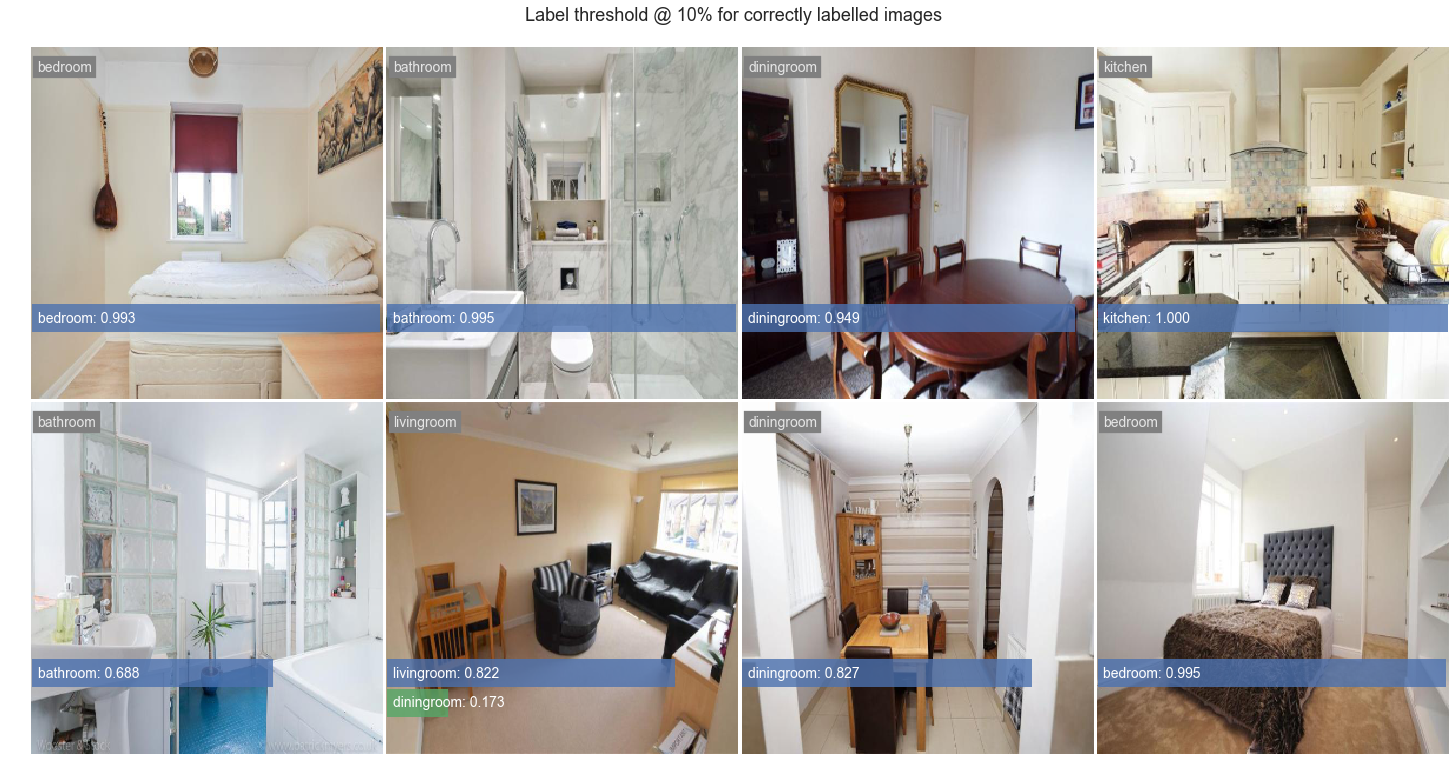

In [33]:
mask1 = ((interior_test_pred['label1_correct'] == True))

mask2 = ((interior_test_pred['pred_from_3'] == interior_test_pred['label2']) |
         (interior_test_pred['pred_from_3'] == interior_test_pred['label3']))

mask3 = ((interior_test_pred['label1_correct'] == False) & (interior_test_pred['label1_P'] > 0.9))

data = interior_test_pred.loc[mask1]

label_fn = nplot.label_probs
label_info = {'num_labels': 3,
              'show_actual': True,
              'threshold' : 0.1
              }


nplot.image_grid(data, image_path='image_path',  image_size='xl', save=True,
           fig_title="Label threshold @ 10% for correctly labelled images ",
            fill_grid=True, f_stem='threshold_10%_correct_labal',
          label_info=label_info, label_fn=label_fn, annotate=True,
                output_dir = './image_grids/')